In [24]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LSTM

max_freq = 10
time_steps = 100

def create_sine(frequency, offset):
    return np.sin(frequency * np.linspace(offset, 2 * np.pi + offset, time_steps))

train_y = list(range(1, max_freq)) * 10
train_x = np.array([create_sine(freq, np.random.uniform(0,1)) for freq in train_y])
train_y = np.array(train_y)

input_series = Input(shape=(time_steps, 1), name='Input')
lstm = LSTM(units=100)(input_series)
#hidden = Dense(units=100, activation='relu')(lstm)
#dropout = Dropout(rate=0.1)(hidden)
#output = Dense(units=1, activation='relu')(dropout)
output = Dense(units=1, activation='relu')(lstm)

model = Model(input_series, output)
model.compile('adam', 'mean_squared_error')
model.fit(train_x.reshape(-1, time_steps, 1), train_y, epochs=200)


Epoch 1/200
90/90 [==============================] - 1s 11ms/step - loss: 31.1950
Epoch 2/200
90/90 [==============================] - 0s 2ms/step - loss: 30.5836
Epoch 3/200
90/90 [==============================] - 0s 2ms/step - loss: 29.8691
Epoch 4/200
90/90 [==============================] - 0s 3ms/step - loss: 28.9086
Epoch 5/200
90/90 [==============================] - 0s 2ms/step - loss: 26.8569
Epoch 6/200
90/90 [==============================] - 0s 2ms/step - loss: 15.0279
Epoch 7/200
90/90 [==============================] - 0s 2ms/step - loss: 7.0093
Epoch 8/200
90/90 [==============================] - 0s 3ms/step - loss: 7.5256
Epoch 9/200
90/90 [==============================] - 0s 2ms/step - loss: 7.2673
Epoch 10/200
90/90 [==============================] - 0s 2ms/step - loss: 6.9181
Epoch 11/200
90/90 [==============================] - 0s 2ms/step - loss: 6.7070
Epoch 12/200
90/90 [==============================] - 0s 2ms/step - loss: 6.8567
Epoch 13/200
90/90 [==========

90/90 [==============================] - 0s 2ms/step - loss: 0.2808
Epoch 103/200
90/90 [==============================] - 0s 3ms/step - loss: 0.2396
Epoch 104/200
90/90 [==============================] - 0s 3ms/step - loss: 0.2317
Epoch 105/200
90/90 [==============================] - 0s 3ms/step - loss: 0.2233
Epoch 106/200
90/90 [==============================] - 0s 3ms/step - loss: 0.2827
Epoch 107/200
90/90 [==============================] - 0s 2ms/step - loss: 0.2737
Epoch 108/200
90/90 [==============================] - 0s 3ms/step - loss: 0.2872
Epoch 109/200
90/90 [==============================] - 0s 3ms/step - loss: 0.1988
Epoch 110/200
90/90 [==============================] - 0s 3ms/step - loss: 0.2506
Epoch 111/200
90/90 [==============================] - 0s 2ms/step - loss: 0.1739
Epoch 112/200
90/90 [==============================] - 0s 3ms/step - loss: 0.1718
Epoch 113/200
90/90 [==============================] - 0s 3ms/step - loss: 0.1481
Epoch 114/200
90/90 [=========

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 100, 1)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

3

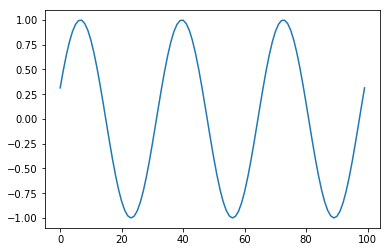

In [27]:
plt.plot(train_x[2])
train_y[2]

In [28]:
# Trying the network on the same data
test_x = train_x.reshape(-1, time_steps, 1)
test_y = train_y
predicted = model.predict(test_x).reshape([-1])
print()
print((predicted - train_y)[:12])
print(np.mean(np.abs(predicted - train_y)))


[ 0.07472134  0.08142638 -0.01609254 -0.08713293 -0.26181173 -0.34765911
 -0.10911226 -0.27532959 -0.43859863 -0.08652669  0.16584897 -0.26691461]
0.175148061911


In [35]:
from sklearn.metrics import classification_report
p = np.round(predicted,0).astype('int')
print(classification_report(train_y, p))


             precision    recall  f1-score   support

          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00        10
          4       1.00      1.00      1.00        10
          5       1.00      1.00      1.00        10
          6       1.00      1.00      1.00        10
          7       1.00      1.00      1.00        10
          8       0.83      1.00      0.91        10
          9       1.00      0.80      0.89        10

avg / total       0.98      0.98      0.98        90



In [17]:
train_x

array([[ 0.48114399,  0.53577534,  0.58824931, ...,  0.36629689,
         0.42457525,  0.48114399],
       [ 0.16415401,  0.28770855,  0.40663376, ..., -0.08884843,
         0.03795817,  0.16415401],
       [ 0.40658267,  0.2263326 ,  0.03790229, ...,  0.71701433,
         0.57213778,  0.40658267],
       ..., 
       [-0.45994529, -0.79693202, -0.97919685, ...,  0.39915739,
        -0.0336616 , -0.45994529],
       [ 0.96319238,  0.97238107,  0.73623681, ...,  0.2794023 ,
         0.71098905,  0.96319238],
       [ 0.54402561,  0.91129821,  0.98924006, ..., -0.53724725,
         0.00402873,  0.54402561]])

In [36]:
freq=15
t = create_sine(freq, np.random.uniform(0,1))
model.predict(t.reshape(-1, time_steps, 1))

array([[ 9.40039921]], dtype=float32)

In [55]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Dropout, LSTM

max_freq = 10
time_steps = 100

def create_sine(frequency, offset):
    return np.sin(frequency * np.linspace(offset, 2 * np.pi + offset, time_steps))

train_y = list(range(1, max_freq)) * 10
train_x = np.array([create_sine(freq, np.random.uniform(0,1)) for freq in train_y])
train_y = np.array(train_y)

input_series = Input(shape=(time_steps, 1), name='Input')
lstm_1 = LSTM(units=100, return_sequences=True)(input_series)
lstm_2 = LSTM(units=100, return_sequences=True)(lstm_1)

lstm_3 = LSTM(units=100, return_sequences=False)(lstm_2)




#hidden = Dense(units=100, activation='relu')(lstm)
#dropout = Dropout(rate=0.1)(hidden)
#output = Dense(units=1, activation='relu')(dropout)
output = Dense(units=1, activation='relu')(lstm_3)

model = Model(input_series, output)
model.compile('adam', 'mean_squared_error')
model.fit(train_x.reshape(-1, time_steps, 1), train_y, epochs=200)



Epoch 1/200
90/90 [==============================] - 3s 31ms/step - loss: 31.3770
Epoch 2/200
90/90 [==============================] - 1s 7ms/step - loss: 29.8839
Epoch 3/200
90/90 [==============================] - 1s 7ms/step - loss: 22.4952
Epoch 4/200
90/90 [==============================] - 1s 8ms/step - loss: 9.8390
Epoch 5/200
90/90 [==============================] - 1s 7ms/step - loss: 7.5352
Epoch 6/200
90/90 [==============================] - 1s 7ms/step - loss: 6.8602
Epoch 7/200
90/90 [==============================] - 1s 7ms/step - loss: 6.9284
Epoch 8/200
90/90 [==============================] - 1s 7ms/step - loss: 6.8422
Epoch 9/200
90/90 [==============================] - 1s 7ms/step - loss: 4.9415
Epoch 10/200
90/90 [==============================] - 1s 7ms/step - loss: 4.5039
Epoch 11/200
90/90 [==============================] - 1s 7ms/step - loss: 4.2960
Epoch 12/200
90/90 [==============================] - 1s 7ms/step - loss: 4.2938
Epoch 13/200
90/90 [=============

90/90 [==============================] - 1s 10ms/step - loss: 2.1598
Epoch 103/200
90/90 [==============================] - 1s 11ms/step - loss: 1.6948
Epoch 104/200
90/90 [==============================] - 1s 8ms/step - loss: 1.3181
Epoch 105/200
90/90 [==============================] - 1s 10ms/step - loss: 1.6521
Epoch 106/200
90/90 [==============================] - 1s 9ms/step - loss: 1.7367
Epoch 107/200
90/90 [==============================] - 1s 8ms/step - loss: 1.1566
Epoch 108/200
90/90 [==============================] - 1s 9ms/step - loss: 0.8013
Epoch 109/200
90/90 [==============================] - 1s 9ms/step - loss: 1.4279
Epoch 110/200
90/90 [==============================] - 1s 8ms/step - loss: 1.0426
Epoch 111/200
90/90 [==============================] - 1s 8ms/step - loss: 1.0617
Epoch 112/200
90/90 [==============================] - 1s 9ms/step - loss: 0.8051
Epoch 113/200
90/90 [==============================] - 1s 9ms/step - loss: 1.0411
Epoch 114/200
90/90 [======

KeyboardInterrupt: 

In [67]:
freq=27
t = create_sine(freq, np.random.uniform(0,1))
model.predict(t.reshape(-1, time_steps, 1))

array([[ 8.784091]], dtype=float32)